In [6]:
#-*- codeing = utf-8 -*- 
"""情感分数的计算"""
import pandas as pd

# 1. 读取数据

data = pd.read_excel('../01_data_get/Data-总（播放量）.xlsx',header=0)

In [7]:
# 2. 获取情感分数
# 导入snownlp数据包然后进行情感分析

from snownlp import SnowNLP
data_title = data['标题']

# 建立一个列表存储情感分数
sentimentslist = []
for i in data_title:
    s = SnowNLP(i)
    print(s.sentiments)
    sentimentslist.append(s.sentiments)

0.17132316746755583
0.9999999995408535
0.9999181439894894
1.0
0.9648990233048524
0.9368463333568903
0.8065460213040473
0.30503005258902127
0.34925817494181877
0.991547986327204
0.9876751027217556
0.714621545386805
0.9494782292586708
0.8099072811117528
1.0
0.996207844539862
0.9998172553209551
0.9999997109369766
0.9830054256303983
0.9999994677464732
0.983269266095763
0.7979119340237472
0.9360695764789932
0.999796994483017
0.6155642811997879
0.011662297606775063
0.6890964105241792
0.9557803647076453
0.9928857920308152
0.5723768045094095
0.14557997058467353
0.8977068675220778
0.999215323619819
0.9999870873307669
0.999973611539583
0.01155314034082111
0.9973517854666949
0.9954866972595793
0.9972630576046979
0.11798720869373414
0.5696261944729734
0.9980785005104744
0.9999722182986253
0.9550776903008342
0.9998476744363095
0.6676223500698756
0.9309301122645951
0.8823376880555452
0.9410940964177175
0.9766987810921207
0.9998116811348748
0.38989927463993435
0.9899933032378225
0.9079393608856255
0.

In [8]:
# 3. 存入数据
import xlwt
wb = xlwt.Workbook()
sheet = wb.add_sheet('sheet')
sheet.write(0, 0, '标题')
sheet.write(0,1, '情感分数')
count = 1
for i in sentimentslist:
    sheet.write(count,0,data_title[count-1])
    sheet.write(count,1,i)
    count += 1

wb.save('情感分数-总.xlsx')

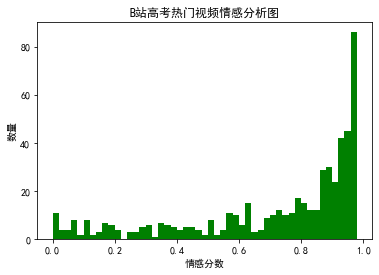

In [9]:
# 4. 情感分数可视化
# 越偏向0负面情绪越强烈，越偏向1正面情绪更强烈 
import matplotlib.pyplot as plt
import numpy as np
from palettable.colorbrewer.qualitative import Pastel1_7

plt.rcParams['font.sans-serif'] = 'simhei'
plt.rcParams['axes.unicode_minus']=False

plt.hist(sentimentslist, bins = np.arange(0, 1, 0.02), facecolor = 'g')
plt.xlabel('情感分数')
plt.ylabel('数量')
plt.title('B站高考热门视频情感分析图')
plt.savefig('情感分析图-总.jpg')
plt.show()

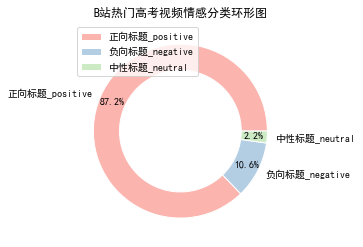

In [10]:
"""标题情感的分类"""
import matplotlib
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7

plt.rcParams['font.sans-serif'] = 'simhei'
plt.rcParams['axes.unicode_minus']=False


正向标题_positive=0
负向标题_negative=0
中性标题_neutral=0

x = sentimentslist
for i in range(0,len(x)):
        if x[i]>=0.45 and x[i]<=0.55:
            中性标题_neutral+=1
        if x[i]>0.55:
            正向标题_positive+=1
        if x[i]<0.45 :
            负向标题_negative+=1



x = ['正向标题_positive', '负向标题_negative','中性标题_neutral']
y = [正向标题_positive,负向标题_negative,中性标题_neutral]
plt.pie(y,pctdistance=0.85,autopct='%.1f%%', labels=x, colors=Pastel1_7.hex_colors, wedgeprops=dict(width=0.3, edgecolor='w'))
plt.legend(x,loc='upper left')
plt.title('B站热门高考视频情感分类环形图')
plt.savefig('情感分类环形图-总.jpg')
